In [14]:
from mostlyai import MostlyAI
import pandas as pd
from tsl.datasets import PemsBay, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets
import os
# get current dir
currentdir = os.getcwd()
print(currentdir)

Generated_path = f'{currentdir}/../../Datasets/GeneratedDatasets/PemsBay/'
TeachForcing_path = f'{currentdir}/../../Datasets/TeachForcingDatasets/'

/Users/paulmagos/Documents/TSGen/Notebooks/Eval


In [15]:
df_PemsBay = PemsBay()
df_PemsBay = df_PemsBay.dataframe()[-2000:].reset_index(drop=True)

df_PemsBay['gen'] = 1

df_PemsBay.columns = df_PemsBay.columns.droplevel('channels')

In [16]:
# syn_PemsBay = pd.read_csv(f'{Generated_path}synteticPemsBayMostlyAI.csv')
syn_PemsBay_dopple = pd.read_csv(f'{Generated_path}synthteticPemsBayDGAN.csv')
syn_PemsBay_GTM = pd.read_csv(f'{Generated_path}synteticPemsBayGTM.csv')
syn_PemsBay_GTLSTM = pd.read_csv(f'{Generated_path}synteticPemsBayGTLSTM.csv')
syn_PemsBay_GRGN = pd.read_csv(f'{Generated_path}synteticPemsBayGRGN.csv')
syn_PemsBay_PAR = pd.read_csv(f'{Generated_path}synteticPemsBayPAR.csv')

# syn_PemsBay.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_PemsBay.columns]
# syn_PemsBay_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_PemsBay_dopple.columns]

syn_PemsBay_GRGN['gen'] = 0
syn_PemsBay_GTLSTM['gen'] = 0
syn_PemsBay_GTM['gen'] = 0
syn_PemsBay_PAR['gen'] = 0
syn_PemsBay_dopple['gen'] = 0

In [17]:
results_df = pd.DataFrame()

In [18]:
df_PemsBay.columns = [str(col) for col in df_PemsBay.columns]
syn_PemsBay_GTM.columns = [str(col) for col in syn_PemsBay_GTM.columns]
syn_PemsBay_dopple.columns = [str(col) for col in syn_PemsBay_dopple.columns]
syn_PemsBay_GTLSTM.columns = [str(col) for col in syn_PemsBay_GTLSTM.columns]
syn_PemsBay_GRGN.columns =  [str(col) for col in syn_PemsBay_GRGN.columns]
syn_PemsBay_PAR.columns =  [str(col) for col in syn_PemsBay_PAR.columns]

In [19]:
out = evaluate_datasets(df_PemsBay, df_PemsBay, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "Original"
res = pd.DataFrame(out, ["PemsBay Original"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [20]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_dopple, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "DGAN"
res = pd.DataFrame(out, ["PemsBay DGAN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [21]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_PAR, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "PAR"
res = pd.DataFrame(out, ["PemsBay PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [22]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GTM, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GTM"
res = pd.DataFrame(out, ["PemsBay GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [23]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GTLSTM, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["PemsBay GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [24]:
out = evaluate_datasets(df_PemsBay, syn_PemsBay_GRGN, 'gen')
out['dataset'] = "PemsBay"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["PemsBay GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [25]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()

In [26]:
results_df_PemsBay = results_df[results_df['dataset'] == 'PemsBay'].sort_values(by=['inception_score_mean'], ascending=False).reset_index(drop=True)
results_df_PemsBay

,mean,variance,skewness,kurtosis,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,correlation_difference,correlation_gen,...,inception_score_std,t_stat,t_stat_p_value,model_accuracy,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,dataset,model,tmp
0,13.805146,221.359387,0.246645,8.193145,0.961260,1.482197e-323,48.695123,0.771200,0.311280,0.123010,...,0.006017,116.731673,0.000000,0.0,0.0,1.000,0.996000,PemsBay,DGAN,1.878149
1,60.638083,0.043417,0.403939,707.508239,0.758236,2.220803e-152,6.823961,0.778453,0.762870,0.001759,...,0.003381,6.048084,0.036341,0.0,0.0,1.000,0.996004,PemsBay,GTLSTM,1.875523
2,57.204341,213.779185,-0.052532,0.146474,0.393089,1.639076e-08,9.324296,0.650506,0.359992,0.021303,...,0.024032,10.088876,0.057507,0.0,0.0,0.994,0.999001,PemsBay,GTM,1.837007
3,60.978551,24.783747,-0.000138,2.841598,0.509514,4.251439e-39,4.251029,0.694452,0.379775,0.003060,...,0.008520,4.253859,0.108281,0.0,0.0,1.000,1.000000,PemsBay,PAR,1.845592
4,60.280437,81.122630,0.002732,0.002607,0.385507,5.456813e-10,6.117977,0.651857,0.379602,0.003043,...,0.054226,8.069593,0.044304,0.0,0.0,1.000,1.000000,PemsBay,GRGN,1.728620
5,62.283215,80.446342,-2.715614,11.460575,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.364914,...,0.000000,0.000000,1.000000,1.0,1.0,1.000,1.000000,PemsBay,Original,1.000000


In [27]:
results_df = results_df.sort_values(by=['correlation_gen'], ascending=True).reset_index(drop=True)
results_df

,mean,variance,skewness,kurtosis,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,correlation_difference,correlation_gen,...,inception_score_std,t_stat,t_stat_p_value,model_accuracy,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,dataset,model,tmp
0,60.638083,0.043417,0.403939,707.508239,0.758236,2.220803e-152,6.823961,0.778453,0.762870,0.001759,...,0.003381,6.048084,0.036341,0.0,0.0,1.000,0.996004,PemsBay,GTLSTM,1.875523
1,60.280437,81.122630,0.002732,0.002607,0.385507,5.456813e-10,6.117977,0.651857,0.379602,0.003043,...,0.054226,8.069593,0.044304,0.0,0.0,1.000,1.000000,PemsBay,GRGN,1.728620
2,60.978551,24.783747,-0.000138,2.841598,0.509514,4.251439e-39,4.251029,0.694452,0.379775,0.003060,...,0.008520,4.253859,0.108281,0.0,0.0,1.000,1.000000,PemsBay,PAR,1.845592
3,57.204341,213.779185,-0.052532,0.146474,0.393089,1.639076e-08,9.324296,0.650506,0.359992,0.021303,...,0.024032,10.088876,0.057507,0.0,0.0,0.994,0.999001,PemsBay,GTM,1.837007
4,13.805146,221.359387,0.246645,8.193145,0.961260,1.482197e-323,48.695123,0.771200,0.311280,0.123010,...,0.006017,116.731673,0.000000,0.0,0.0,1.000,0.996000,PemsBay,DGAN,1.878149
5,62.283215,80.446342,-2.715614,11.460575,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.364914,...,0.000000,0.000000,1.000000,1.0,1.0,1.000,1.000000,PemsBay,Original,1.000000


In [28]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean', 'variance', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()
original = best_grgn_models.loc[best_grgn_models['model'] == 'Original']

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean', 'variance', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models.loc[best_grgn_models['model'] == 'Original', col + '_rank'] = 100
    best_grgn_models.loc[best_grgn_models['model'] != 'Original', col + '_rank'] = best_grgn_models.loc[best_grgn_models['model'] != 'Original', col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy', 'inception_score_mean']:
    best_grgn_models.loc[best_grgn_models['model'] == 'Original', col + '_rank'] = 100
    best_grgn_models.loc[best_grgn_models['model'] != 'Original', col + '_rank'] = best_grgn_models.loc[best_grgn_models['model'] != 'Original', col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models

,dataset,model,mean,variance,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_rank,variance_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,PemsBay,GTM,57.204341,213.779185,0.393089,9.324296,0.650506,0.359992,0.0,1.861039,2.0,4.0,2.0,4.0,1.0,2.0,3.0,3.0,21.0
1,PemsBay,GRGN,60.280437,81.122630,0.385507,6.117977,0.651857,0.379602,0.0,1.782846,3.0,3.0,1.0,2.0,2.0,3.0,3.0,5.0,22.0
2,PemsBay,PAR,60.978551,24.783747,0.509514,4.251029,0.694452,0.379775,0.0,1.854112,5.0,2.0,3.0,1.0,3.0,4.0,3.0,4.0,25.0
3,PemsBay,DGAN,13.805146,221.359387,0.961260,48.695123,0.771200,0.311280,0.0,1.884167,1.0,5.0,5.0,5.0,4.0,1.0,3.0,1.0,25.0
4,PemsBay,GTLSTM,60.638083,0.043417,0.758236,6.823961,0.778453,0.762870,0.0,1.878904,4.0,1.0,4.0,3.0,5.0,5.0,3.0,2.0,27.0
5,PemsBay,Original,62.283215,80.446342,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,800.0


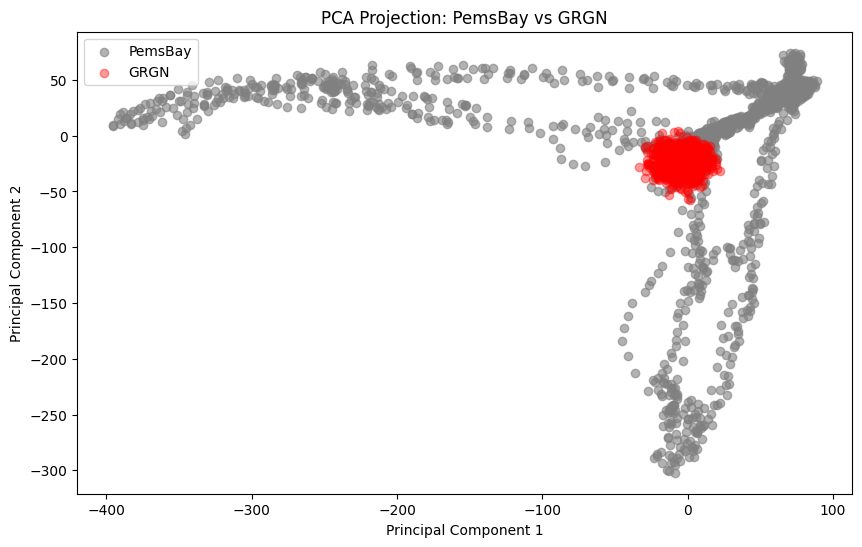

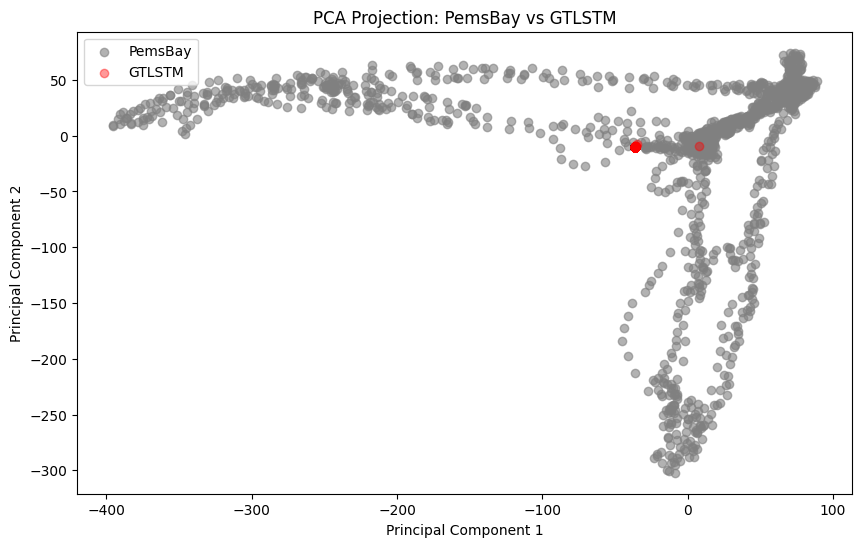

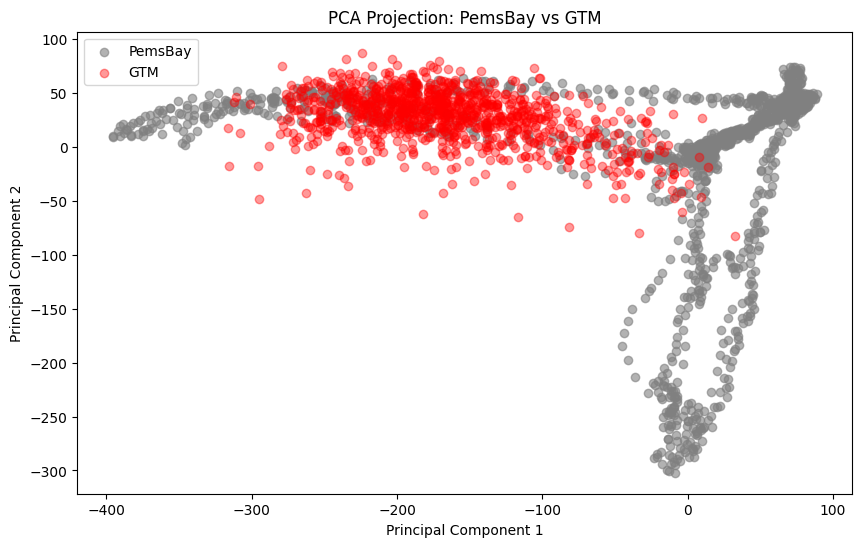

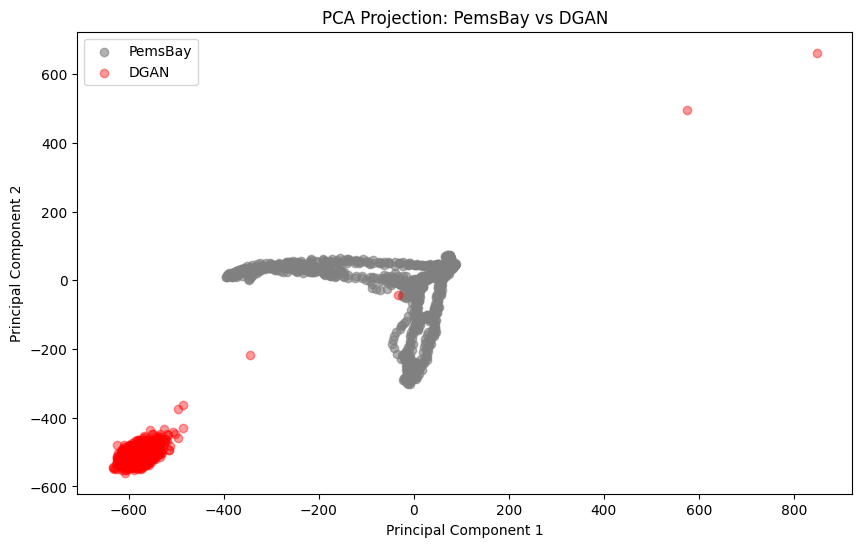

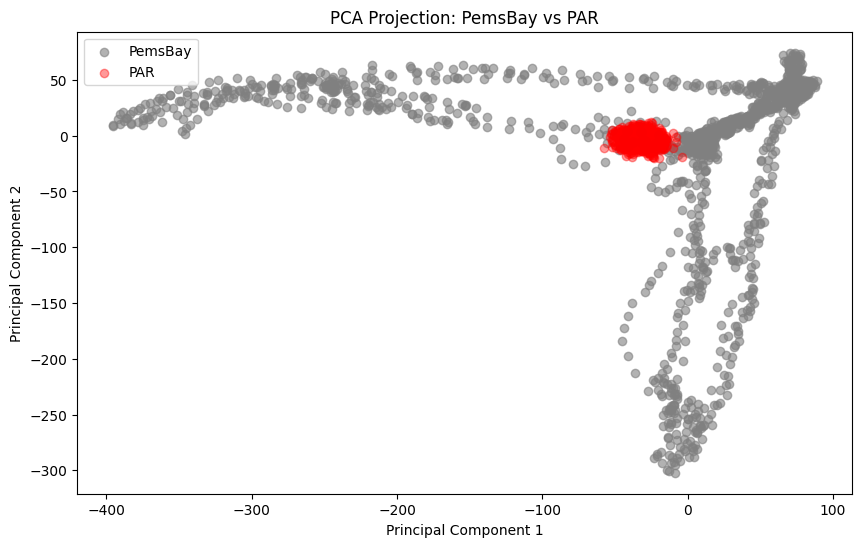

In [29]:
from VisualEval import plot_pca

plot_pca(df_PemsBay, syn_PemsBay_GRGN, 'PemsBay', 'GRGN')
plot_pca(df_PemsBay, syn_PemsBay_GTLSTM, 'PemsBay', 'GTLSTM')
plot_pca(df_PemsBay, syn_PemsBay_GTM, 'PemsBay', 'GTM')
plot_pca(df_PemsBay, syn_PemsBay_dopple, 'PemsBay', 'DGAN')
plot_pca(df_PemsBay, syn_PemsBay_PAR, 'PemsBay', 'PAR')

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


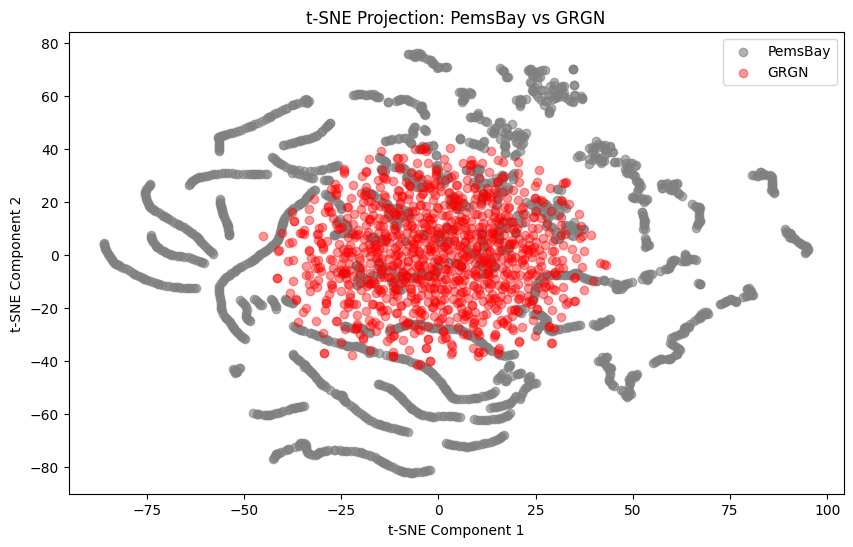

In [30]:
from VisualEval import plot_tsne

plot_tsne(df_PemsBay, syn_PemsBay_GRGN, 'PemsBay', 'GRGN')
# plot_tsne(df_PemsBay, syn_PemsBay_GTLSTM, 'PemsBay', 'GTLSTM')
# plot_tsne(df_PemsBay, syn_PemsBay_GTM, 'PemsBay', 'GTM')
# plot_tsne(df_PemsBay, syn_PemsBay_dopple, 'PemsBay', 'DGAN')
# plot_tsne(df_PemsBay, syn_PemsBay_PAR, 'PemsBay', 'PAR')

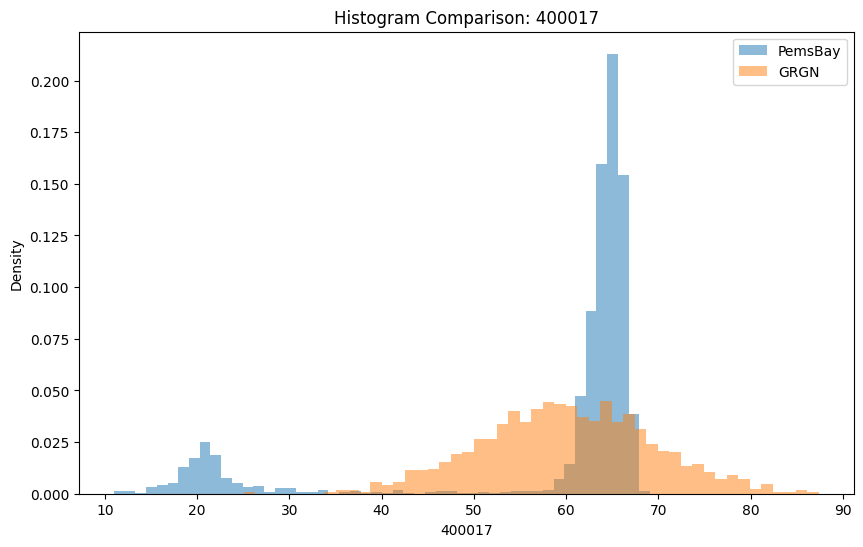

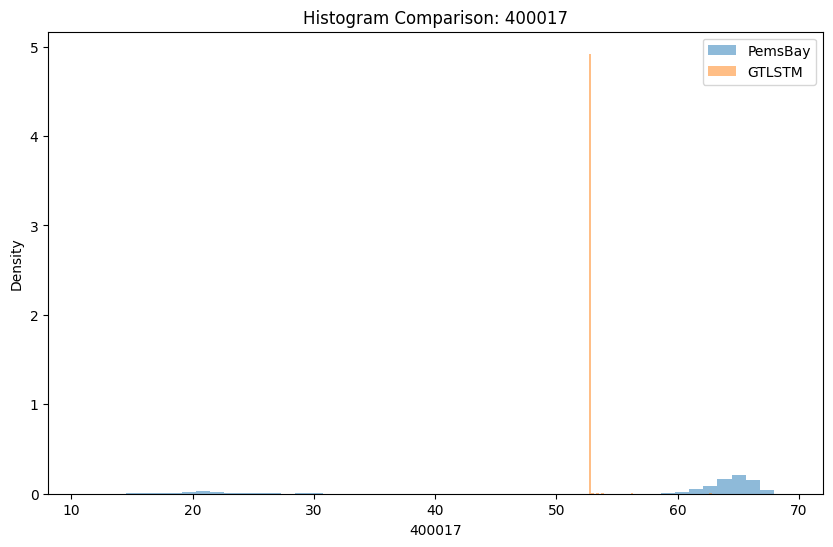

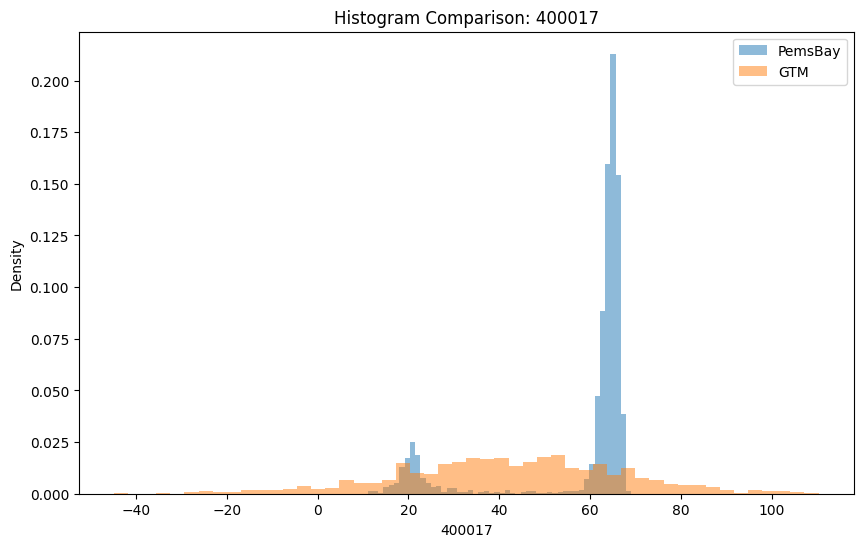

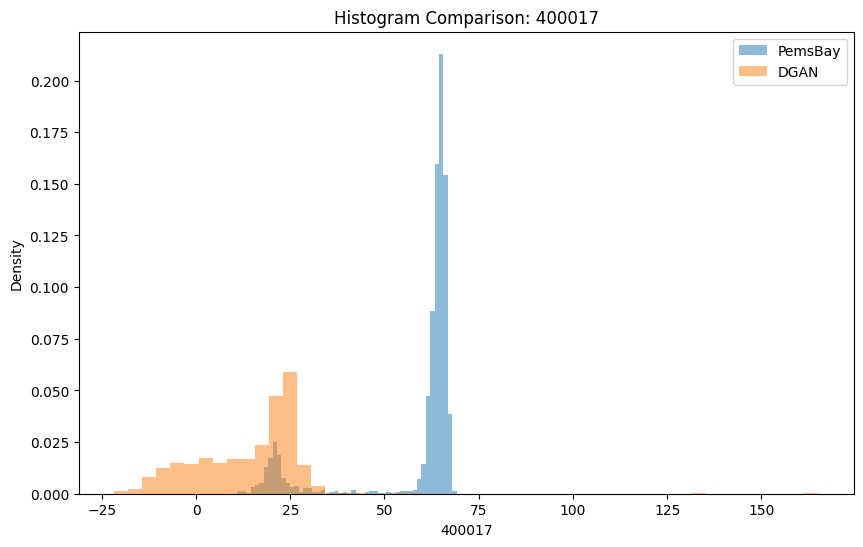

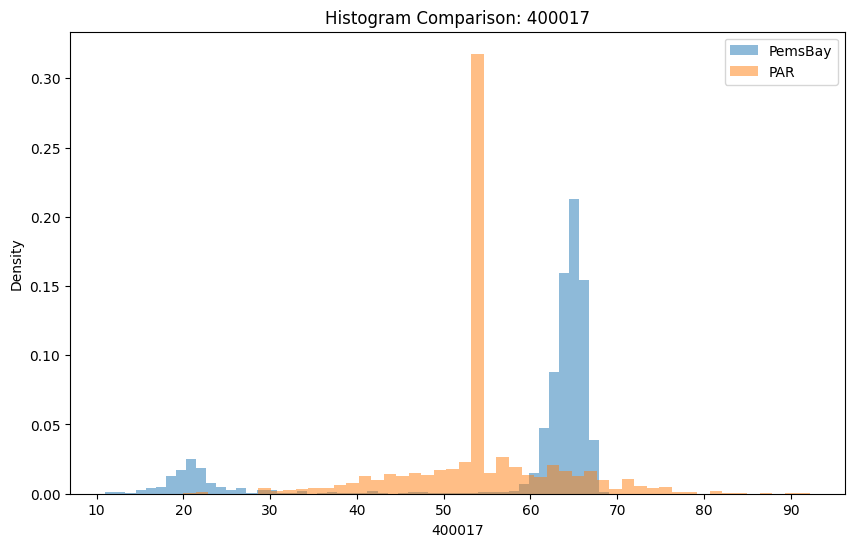

In [33]:
from VisualEval import plot_histograms

plot_histograms(df_PemsBay, syn_PemsBay_GRGN, '400017', 'PemsBay', 'GRGN')
plot_histograms(df_PemsBay, syn_PemsBay_GTLSTM, '400017', 'PemsBay', 'GTLSTM')
plot_histograms(df_PemsBay, syn_PemsBay_GTM, '400017', 'PemsBay', 'GTM')
plot_histograms(df_PemsBay, syn_PemsBay_dopple, '400017', 'PemsBay', 'DGAN')
plot_histograms(df_PemsBay, syn_PemsBay_PAR, '400017', 'PemsBay', 'PAR')

/Users/paulmagos/Documents/TSGen/Notebooks/Eval/VisualEval.py:175: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


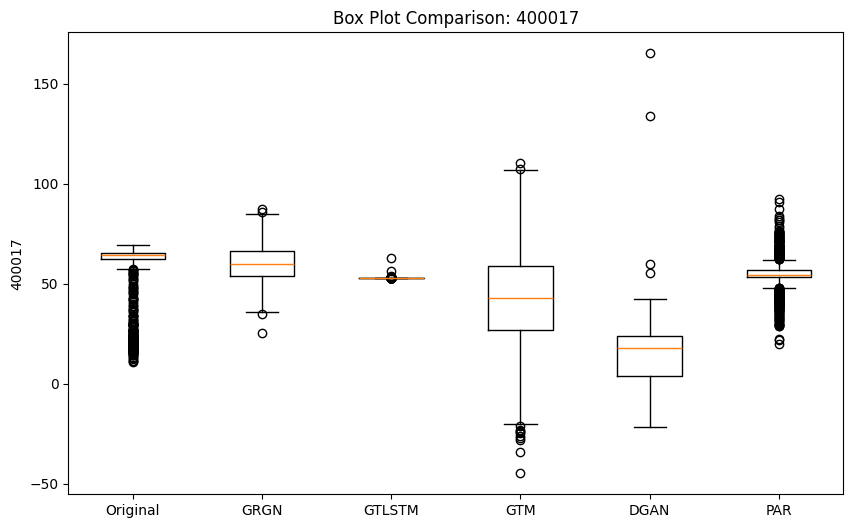

In [35]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('400017', ('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

/Users/paulmagos/Documents/TSGen/Notebooks/Eval/VisualEval.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


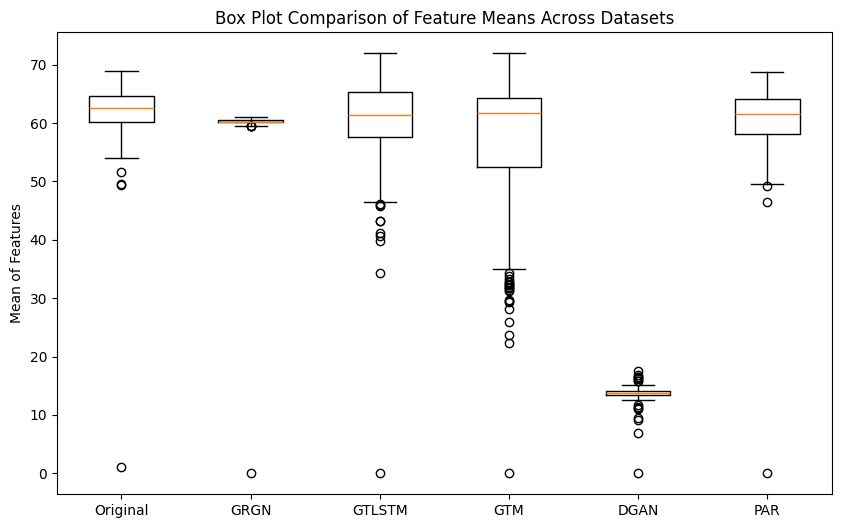

In [36]:
plot_boxplots_means(('Original', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                   ('GTLSTM', syn_PemsBay_GTLSTM), 
                   ('GTM', syn_PemsBay_GTM), 
                   ('DGAN', syn_PemsBay_dopple), 
                   ('PAR', syn_PemsBay_PAR))

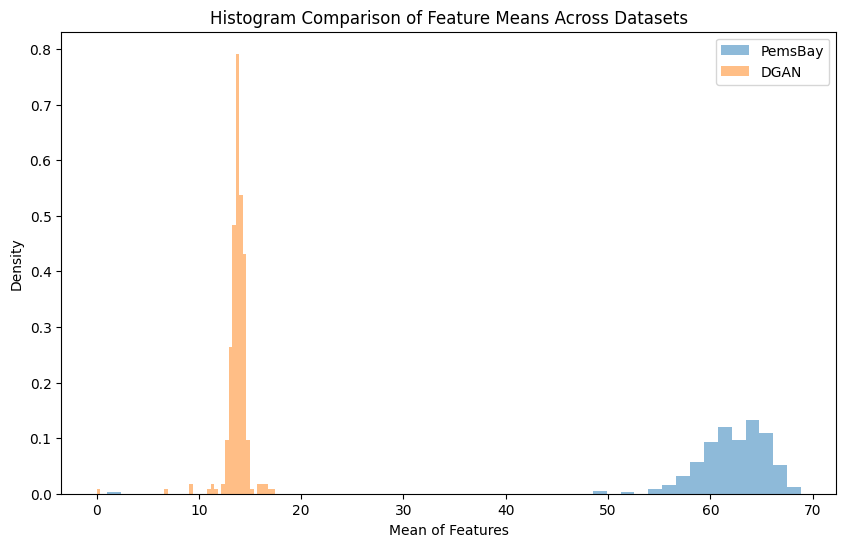

In [37]:
plot_histograms_means(('PemsBay', df_PemsBay), 
                #    ('GRGN', syn_PemsBay_GRGN), 
                  #  ('GTLSTM', syn_PemsBay_GTLSTM), 
                #    ('GTM', syn_PemsBay_GTM),  
                   ('DGAN', syn_PemsBay_dopple), 
                  #  ('PAR', syn_PemsBay_PAR) 
                   )

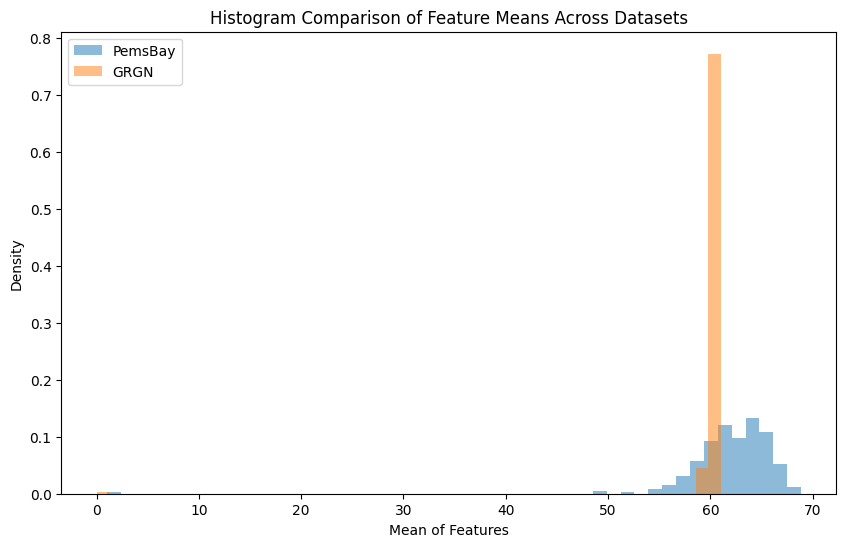

In [38]:
plot_histograms_means(('PemsBay', df_PemsBay), 
                   ('GRGN', syn_PemsBay_GRGN), 
                #    ('GTLSTM', syn_PemsBay_GTLSTM), 
                #    ('GTM', syn_PemsBay_GTM),  
                #    ('DCGAN', syn_PemsBay_dopple), 
                  #  ('PAR', syn_PemsBay_PAR)
                   )

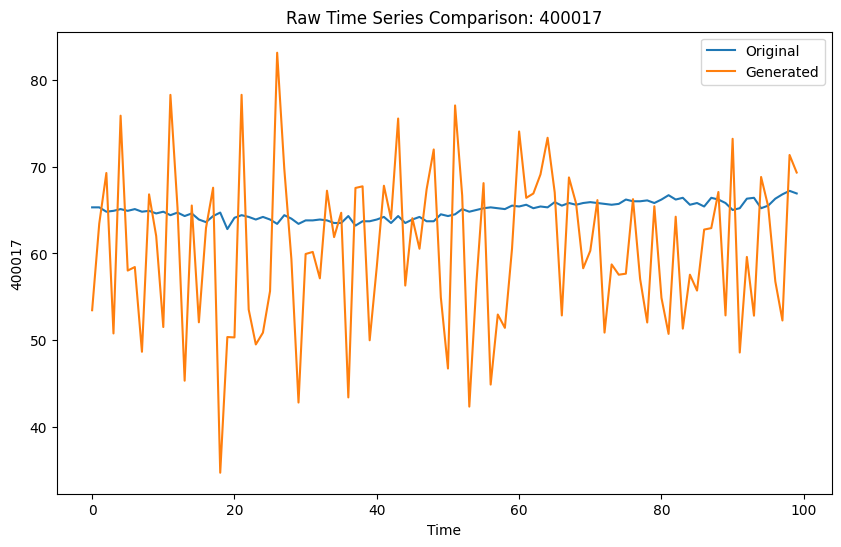

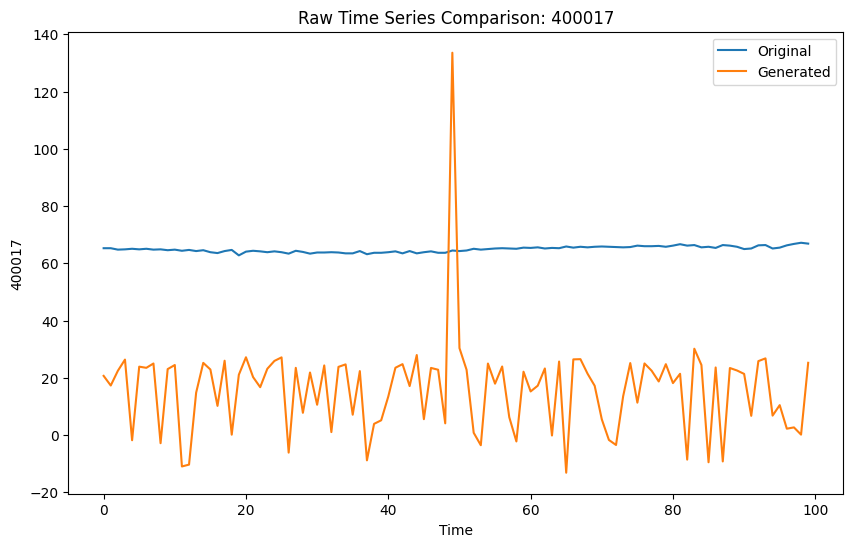

In [40]:
from VisualEval import plot_raw_time_series

plot_raw_time_series(df_PemsBay[-len(df_PemsBay):-(len(df_PemsBay)-100)], syn_PemsBay_GRGN[-len(syn_PemsBay_GRGN):-(len(syn_PemsBay_GRGN)-100)], '400017', 'index')
plot_raw_time_series(df_PemsBay[-len(df_PemsBay):-(len(df_PemsBay)-100)], syn_PemsBay_dopple[-len(syn_PemsBay_dopple):-(len(syn_PemsBay_dopple)-100)], '400017', 'index')